# Evaluation Project-4

# Project Name-Global Power Plant Database

                                                          Submitted by-Nasim Patil

# Problem Statement

# Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check Top 5 Rows

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# Check last 5 rows

In [15]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

# Checking Rows and columns

In [17]:
df.shape

(907, 27)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Checking Data Types

In [20]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We conclude that there are float and object data types present

# Checking Columns

In [22]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

About columns

1.Country-This column shows country code corresponding to specification.

2.Country_long-This column shows the longer form of the country designation.

3.Name-This column shows the name or title of the power plant

4.Gppd_idnr-This shows the 10 or 12 character identifier for the power plant

5.Capacity_mw-This column shows the electrical generating capacity in megawatts.

6.Latitude-This column shows the gelocation in decimal degrees

7.Primary_fuel-This column shows the energy source used in primary electricity generation or export.

8.Other_fuel-This column shows the energy source used in primary electricity generation or export.

# Checking Null Values-

In [24]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Conclusion:

Null values are present in our dataset.

From above observations-

*column 'other_fuel2'have 906 out of 907,so we will drop this column.

*column 'other_fuel3' and 'wepp_id' contains only null value data.

*column 'generation_gwh_2013' and 'generation_gwh_2019' contains only null value data.

*column 'estimated_generation_gwh' also contain only null value data.

*column which contain only null value data we will drop it.

*We will handle rest column containing null value with mean,mode,etc.

Checking Null Values using Heatmap -

<AxesSubplot:>

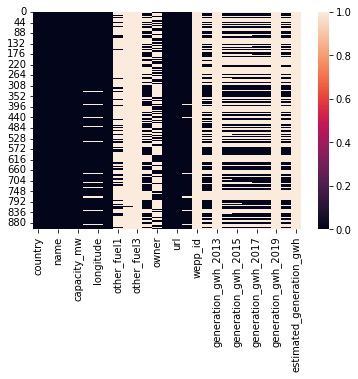

In [25]:
sns.heatmap(df.isnull())

# Handling Null Values

In [6]:
#Filling Null Values of 'Latitude' column in dataset by mean value
df['latitude'].fillna(df['latitude'].mean(),inplace=True)

In [7]:
df['longitude'].fillna(df['longitude'].mean(),inplace=True)

In [8]:
df['commissioning_year'].fillna(df['commissioning_year'].mean(),inplace=True)

In [9]:
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(),inplace=True)

In [10]:
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(),inplace=True)

In [11]:
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(),inplace=True)

In [12]:
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(),inplace=True)

In [13]:
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(),inplace=True)

In [14]:
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean(),inplace=True)

In [15]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)

In [16]:
#Dropping all the irrelevant columns.
df.drop(columns=['owner','wepp_id','other_fuel1','other_fuel3','other_fuel2','generation_data_source','estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

Now,there are no null values presnt in our dataset.

In [58]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [59]:
df.shape

(907, 18)

# Descriptive Statistics

In [18]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018  contains continuous data.

Country,country_long,name,gpdp_idnr,primary_fuel,owner,source,url,geolocation_source contains categorical data.

There is no null value in dataset and count is 907 in each column

Descriptive Statistics using Heatmap-

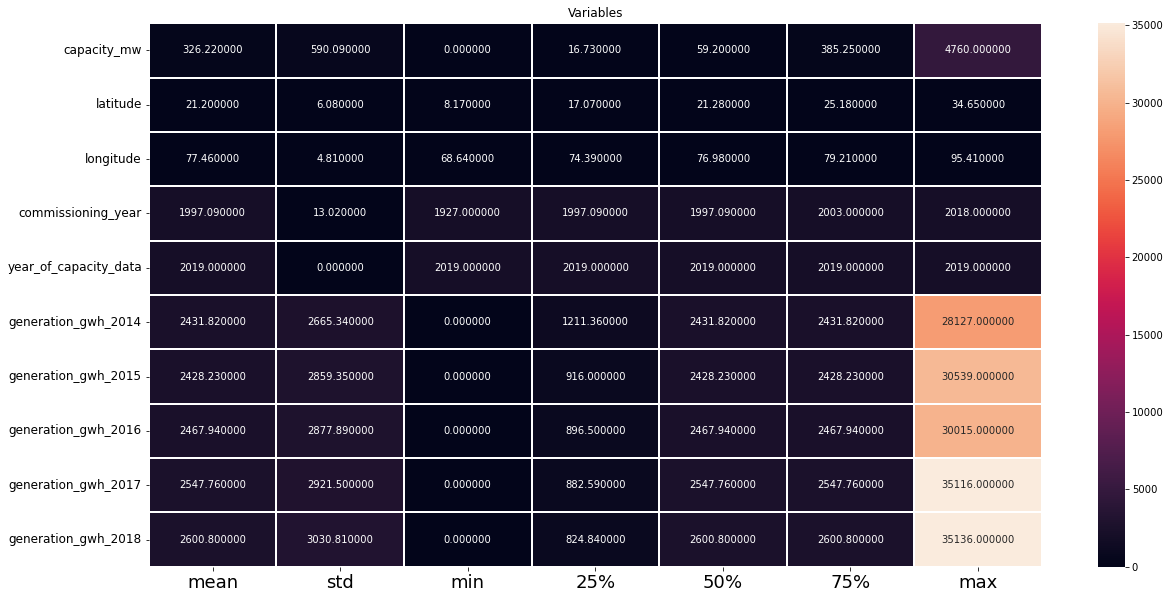

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Variables')
plt.show()

We can conclude that-

Difference between 25% and 50% in columns(generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018) are more compare to its 50% and 75%(difference is 0),which shows outliers are present.

Value of Std is higher than mean which shows skewness is present in most columns,we will check for skewness later.

Difference between 25% and 50% in columns commissioning_year is 0 and its 50% and 75%(high difference),which shows outliers are present in it.

Also in column capacity_mw differene is high between 50% and 75% compare to difference between 25% and 50% which shows outliers are present in it.

Year_of _capacity_data have only one type of data,which means it have no relation with our target column,so we will drop it.

In [20]:
df=df.drop(columns='year_of_capacity_data',axis=1)

In [21]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [23]:
#Dropping column gppd_idnr as it has no relation with our target column
df=df.drop(columns='gppd_idnr',axis=1)

In [24]:
#Dropping column 'country' as it have only one type of value 'IND' And it has no relation with target variable
df=df.drop(columns='country',axis=1)

In [25]:
#Dropping column 'country_long' as it have only one type of value 'India' And it has no relation with target variable
df=df.drop(columns='country_long',axis=1)

In [26]:
#Dropping column 'name'  it has no relation with target variable
df=df.drop(columns='name',axis=1)

In [28]:
#Dropping column 'source' has no relation with target variable
df=df.drop(columns='source',axis=1)

In [29]:
#Dropping column 'url'  has no relation with target variable
df=df.drop(columns='url',axis=1)

In [30]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [31]:
df.shape

(907, 11)

# Data Visualization

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

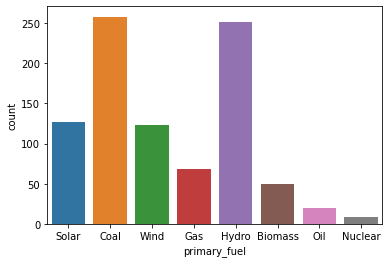

In [33]:
sns.countplot('primary_fuel',data=df)

Coal is used most as primary_fuel and Nuclear as least

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

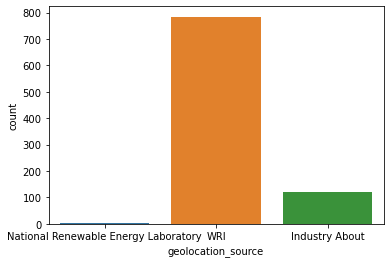

In [34]:
sns.countplot('geolocation_source',data=df)

'WRI' is more as geolocation_source then 'industry about' and then 'National Renewable Energy Laboratory'

Histplot for Continuous data

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

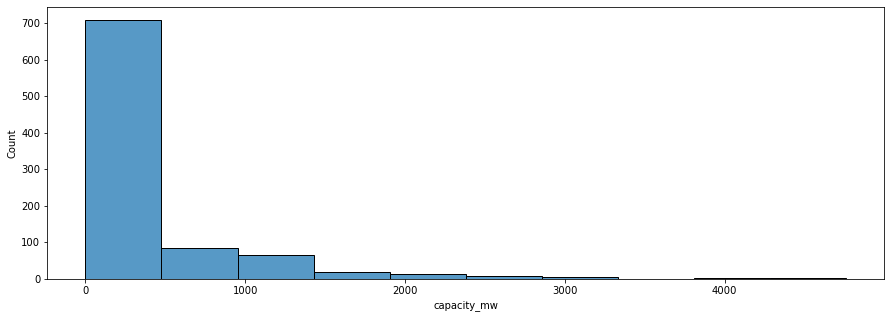

In [35]:
plt.figure(figsize=(15,5))
sns.histplot(x='capacity_mw',data=df,bins=10)

capacity_mw between 0 to 500 is highest.

<AxesSubplot:xlabel='latitude', ylabel='Count'>

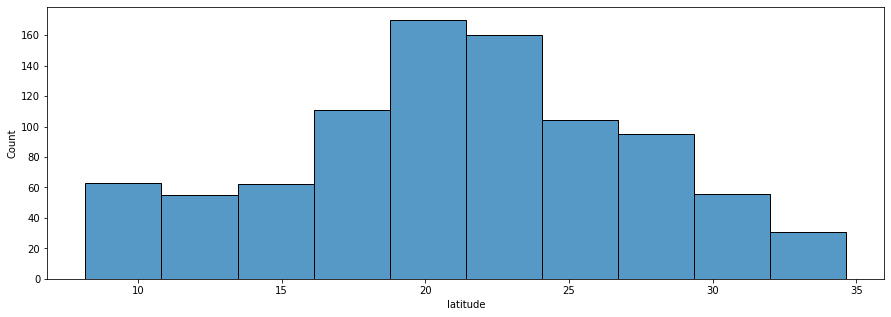

In [37]:
plt.figure(figsize=(15,5))
sns.histplot(x='latitude',data=df,bins=10)

Latitude in between 19-21 is highest

<AxesSubplot:xlabel='longitude', ylabel='Count'>

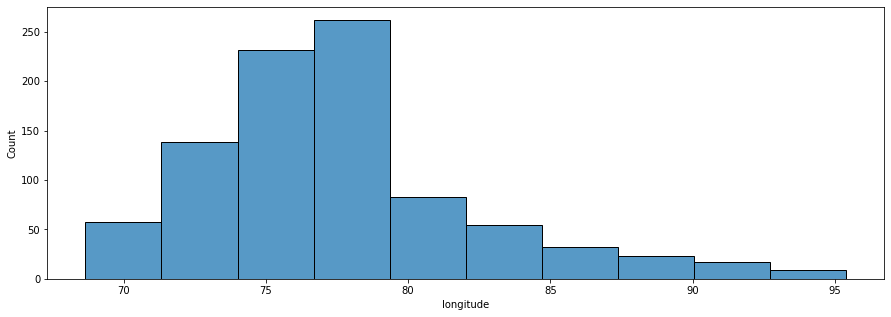

In [38]:
plt.figure(figsize=(15,5))
sns.histplot(x='longitude',data=df,bins=10)

longitude between 77 to 79 is highest

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

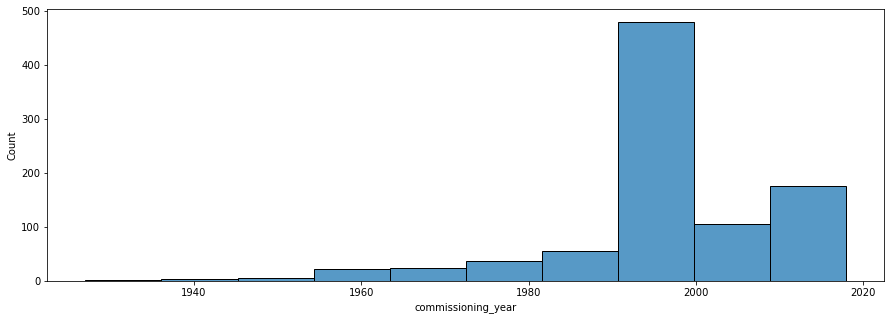

In [39]:
plt.figure(figsize=(15,5))
sns.histplot(x='commissioning_year',data=df,bins=10)

commissioning_year 1997 is highest

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Count'>

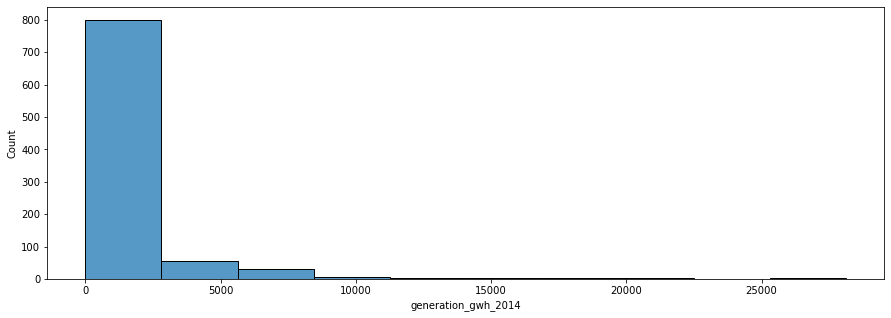

In [40]:
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2014',data=df,bins=10)

generation_gwh_2014 between 0 to 2500 is highest.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Count'>

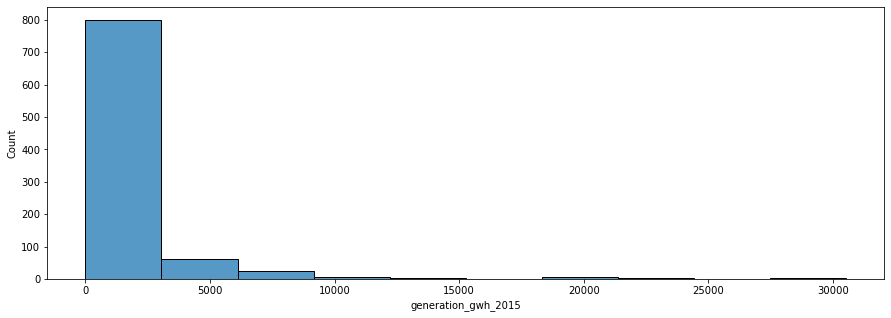

In [42]:
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2015',data=df,bins=10)

generation_gwh_2015 between 0 to 2500 is highest.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Count'>

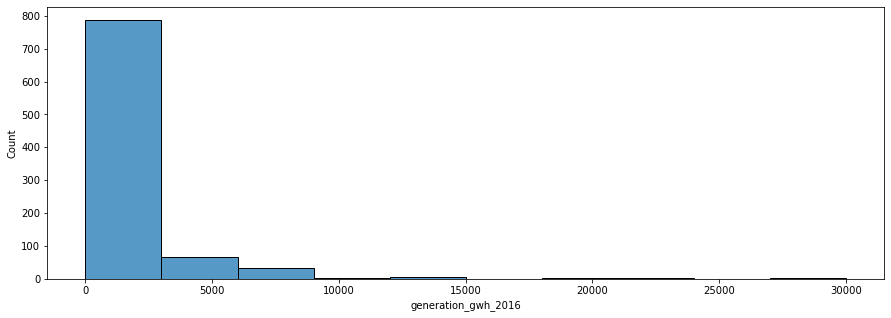

In [43]:
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2016',data=df,bins=10)

generation_gwh_2016 between 0 to 2500 is highest.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Count'>

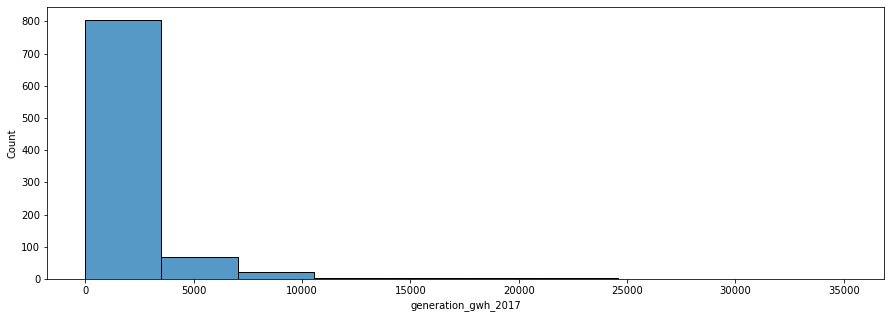

In [44]:
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2017',data=df,bins=10)

generation_gwh_2016 between 0 to 2500 is highest.

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Count'>

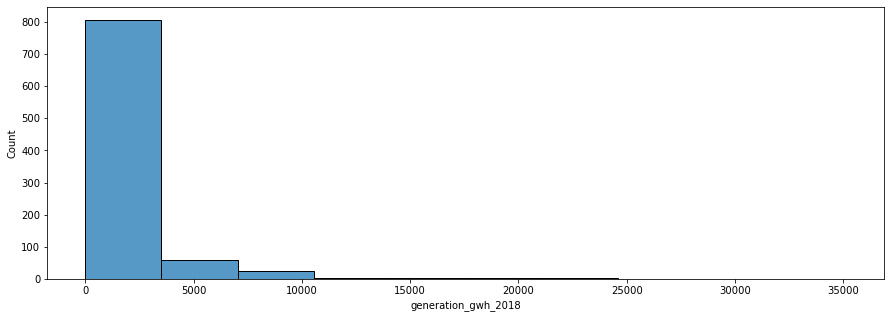

In [45]:
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2018',data=df,bins=10)

generation_gwh_2016 between 0 to 2700 is highest.

Bivariate Analysis

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

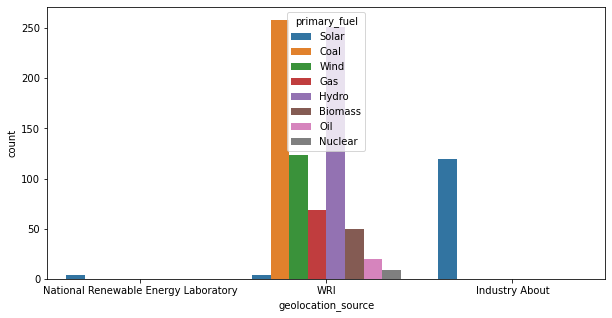

In [46]:
plt.figure(figsize=(10,5))
sns.countplot('geolocation_source',data=df,hue='primary_fuel')

'WRI' geolocation_source uses coal most then Hydro and solar least

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

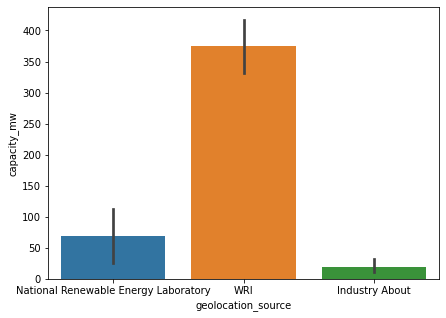

In [49]:
plt.figure(figsize=(7,5))
sns.barplot(x='geolocation_source',data=df,y='capacity_mw')

We can see 'WRI' geolocation_source uses coal most then Hydro and solar least

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

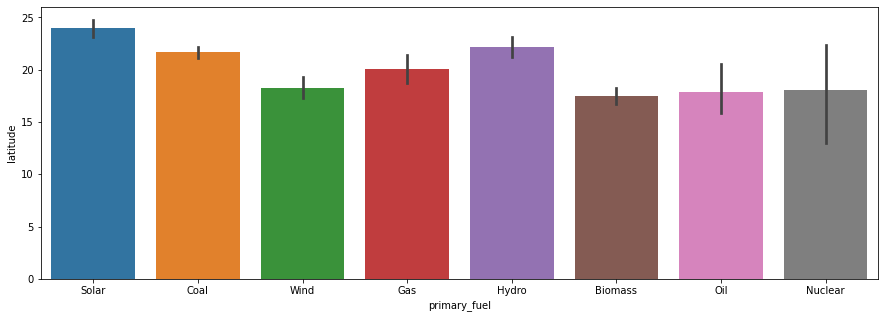

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(y='latitude',data=df,x='primary_fuel')

We can see Solar is used most

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

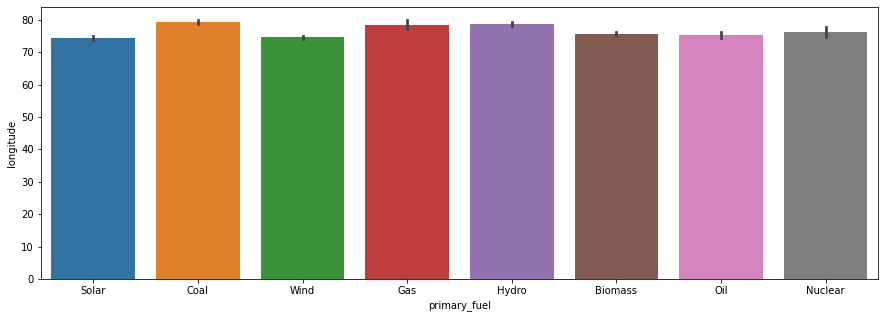

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(y='longitude',data=df,x='primary_fuel')

We can see coal is used most

<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

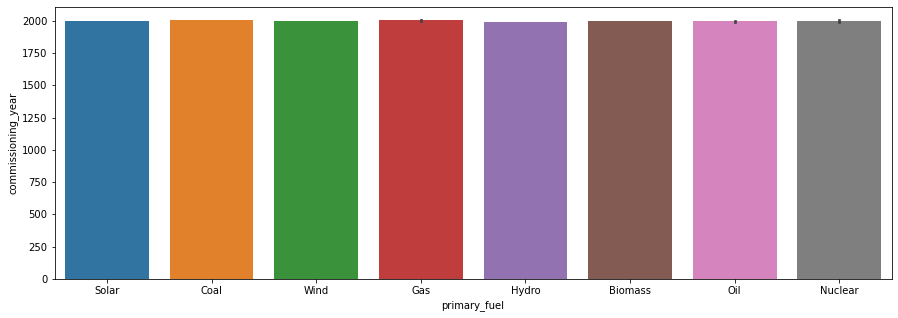

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(y='commissioning_year',data=df,x='primary_fuel')

All primary_fuel used equally

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

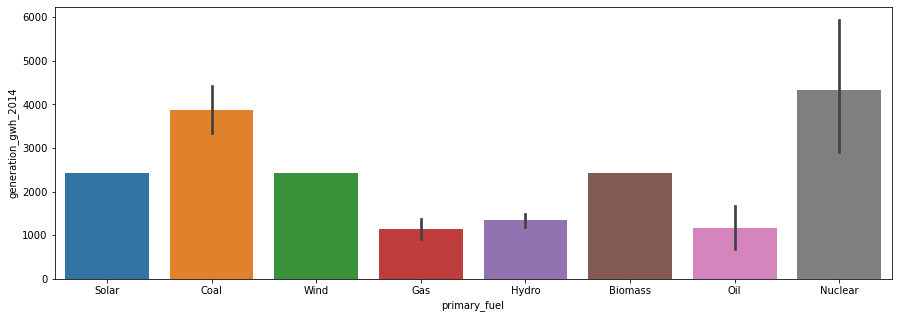

In [54]:
plt.figure(figsize=(15,5))
sns.barplot(y='generation_gwh_2014',data=df,x='primary_fuel')

We can see Nuclear is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

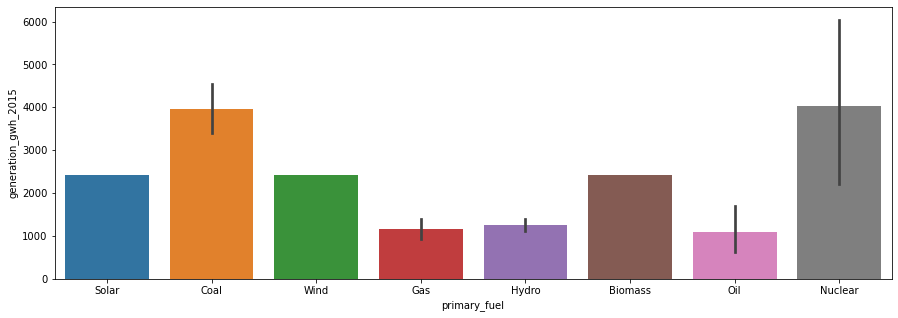

In [55]:
plt.figure(figsize=(15,5))
sns.barplot(y='generation_gwh_2015',data=df,x='primary_fuel')

We can see Nuclear is used most

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

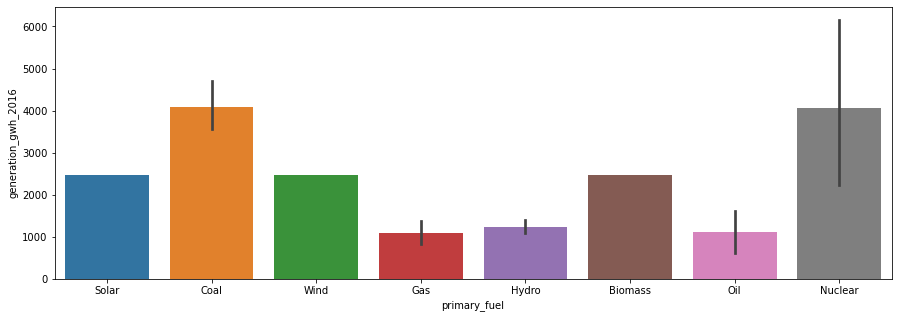

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(y='generation_gwh_2016',data=df,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

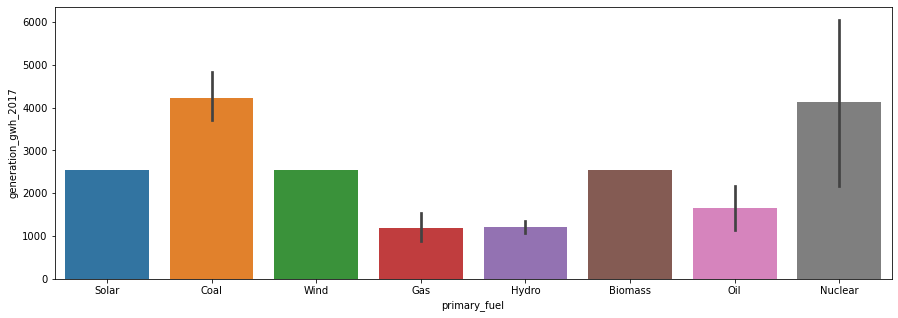

In [57]:
plt.figure(figsize=(15,5))
sns.barplot(y='generation_gwh_2017',data=df,x='primary_fuel')

We can see Coal is used most

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

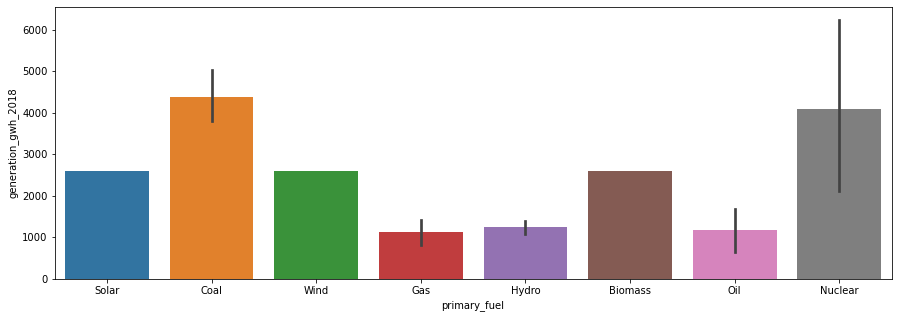

In [58]:
plt.figure(figsize=(15,5))
sns.barplot(y='generation_gwh_2018',data=df,x='primary_fuel')

We can see Coal is used most

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

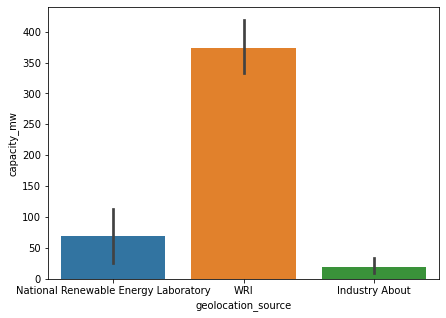

In [60]:
plt.figure(figsize=(7,5))
sns.barplot(x='geolocation_source',data=df,y='capacity_mw')

WRI is used most

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

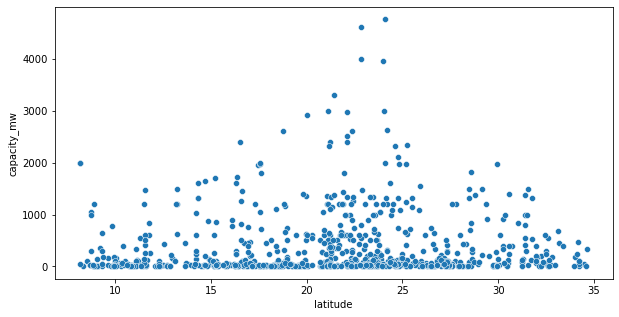

In [61]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='latitude',data=df,y='capacity_mw')

We can see there is correlation between 'latitude' column and 'capacity_mw' column

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

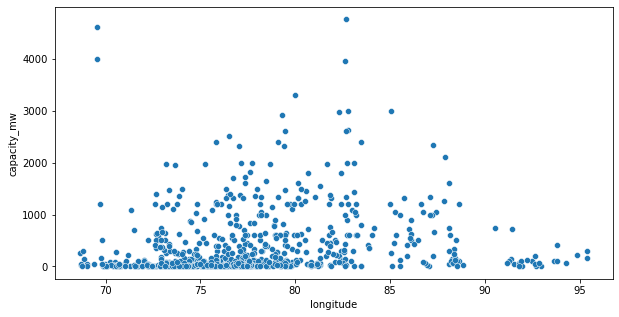

In [62]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='longitude',data=df,y='capacity_mw')

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

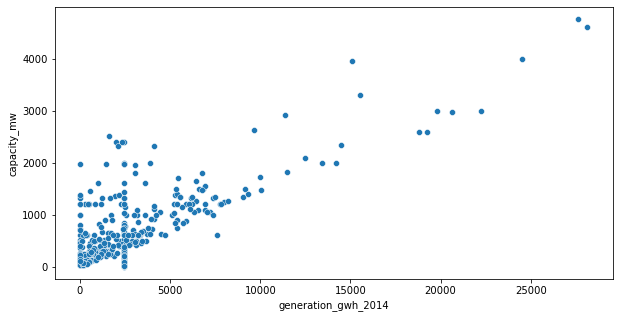

In [63]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='generation_gwh_2014',data=df,y='capacity_mw')

We can see it is high positive correlation between 'generation_gwh_2014' column and 'capacity_mw' column

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

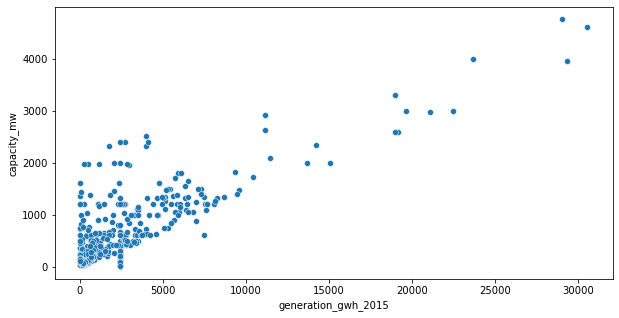

In [64]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='generation_gwh_2015',data=df,y='capacity_mw')

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

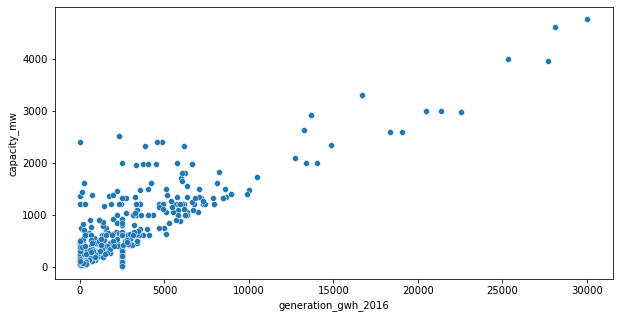

In [65]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='generation_gwh_2016',data=df,y='capacity_mw')

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

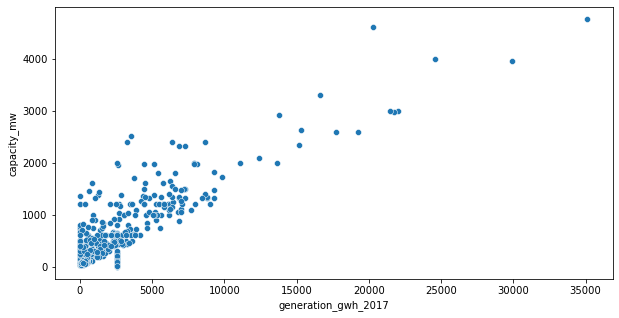

In [66]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='generation_gwh_2017',data=df,y='capacity_mw')

We can see it is high positive correlation between 'generation_gwh_2017'and 'capacity_mw' column

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

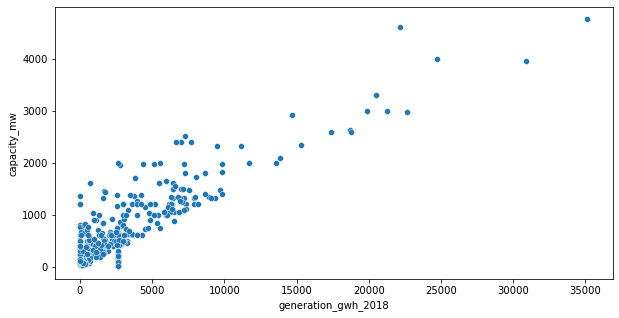

In [67]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='generation_gwh_2018',data=df,y='capacity_mw')

We can see it is high positive correlation between 'generation_gwh_2018'and 'capacity_mw' column

Multivariate Analysis

<AxesSubplot:>

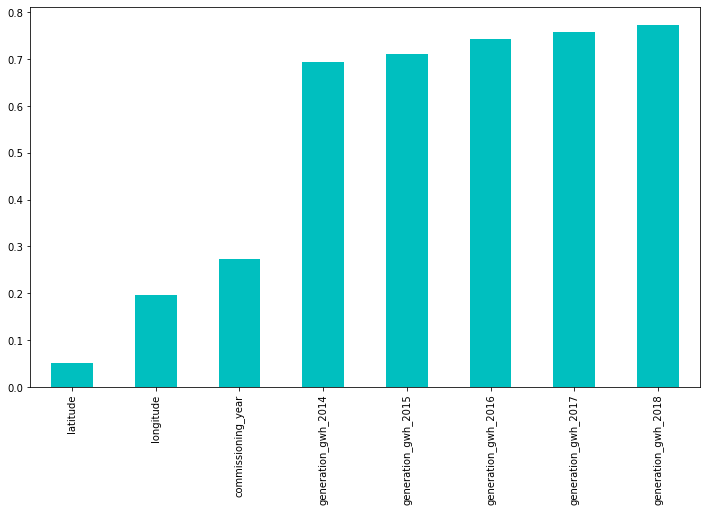

In [68]:
plt.figure(figsize=(12,7))
df.corr()['capacity_mw'].sort_values(ascending=True).drop(['capacity_mw']).plot(kind='bar',color='c')

We can see all columns are positively correlated with target column 'capacity_mw'

# Correlation

In [69]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.274292,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.102069,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,0.092331,0.011472,0.018818,0.039209,0.039675,0.037780
commissioning_year,0.274292,0.102069,0.092331,1.000000,0.133051,0.147338,0.170644,0.170863,0.174377
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,0.174377,0.884956,0.923461,0.957159,0.982689,1.000000


This gives the correlation between the dependent and independent variables.

In [70]:
df.corr()['capacity_mw'].sort_values()

latitude               0.050984
longitude              0.195882
commissioning_year     0.274292
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

We can observe least correlation is with column 'latitude' and strong correlation is with column 'generation_gwh_2018'

All columns are positively correlated with target column 'capacity_mw'

Checking correlation using heatmap

<AxesSubplot:>

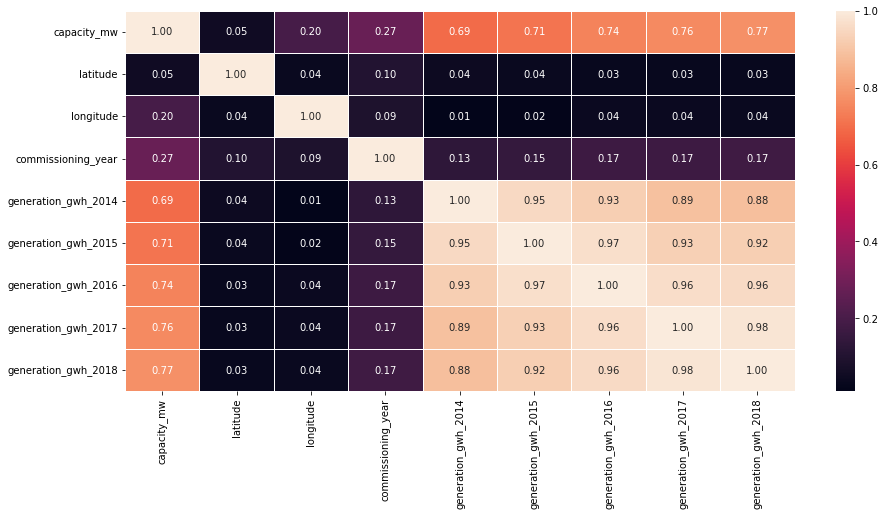

In [71]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='white',fmt='.2f')

latitude has 5 percent correlation with the target column which can be considered as weak correlation and positively correlated.

longitude has 20 percent correlation with the target column which can be considered as good correlation.

commissioning_year has 27 percent correlation with the target column which can be considered as good correlation and positively correlated.

generation_gwh_2014 has 69 percent correlation with the target column.

generation_gwh_2015 has 71 percent correlation with the target column.

generation_gwh_2016 has 74 percent correlation with the target column.

generation_gwh_2017 has 76 percent correlation with the target column.

generation_gwh_2018 has 77 percent correlation with the target column and all are good correlation and positively correlated

Min Correlation:Latitude
    
Max Correlation-generation_gwh_2018






# Label Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [74]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [75]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

Checking both target column unique value after transformation

In [76]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [77]:
df['capacity_mw'].nunique()

361

Dataset after transformation

In [78]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [79]:
df.shape

(907, 11)

In [80]:
df.corr()['primary_fuel'].sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.347948
generation_gwh_2018   -0.136983
generation_gwh_2017   -0.132003
generation_gwh_2016   -0.131051
commissioning_year    -0.126650
generation_gwh_2015   -0.124828
generation_gwh_2014   -0.124769
latitude              -0.010204
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

All columns are negatively correlated with Target Column 'primary_fuel'

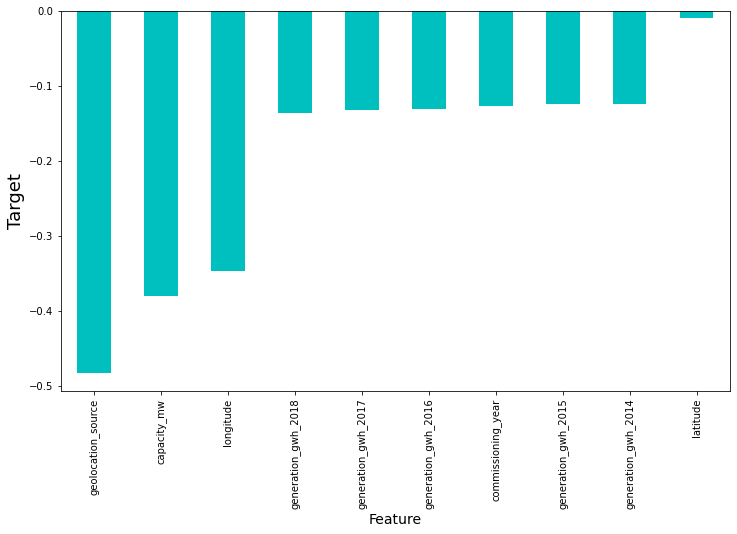

In [81]:
plt.figure(figsize=(12,7))
df.corr()['primary_fuel'].sort_values(ascending=True).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=18)
plt.show()

All columns are negatively correlated with Target Column 'primary_fuel'

<AxesSubplot:>

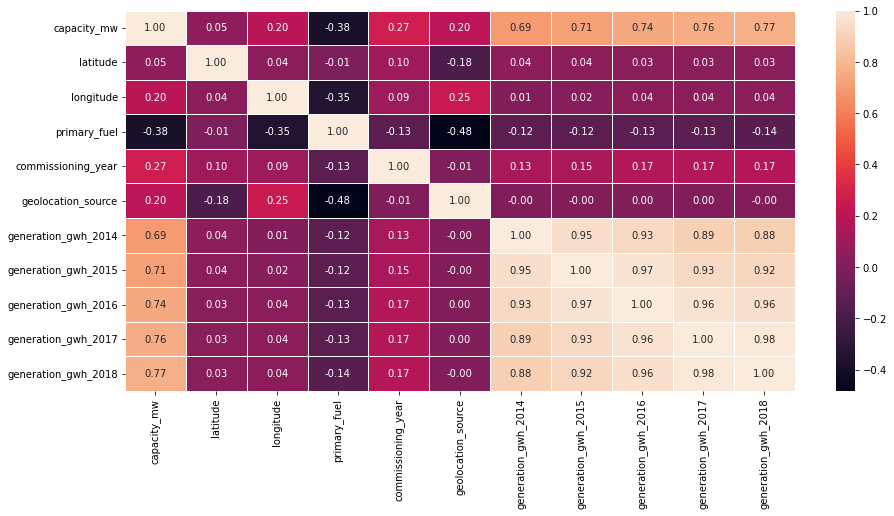

In [82]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='white',fmt='.2f')

Outcome of Correlation with Target Column 'primary_fuel':
    
capacity_mw has 38 percent correlation with the target column which can be considered as good correlation and negatively correlated

latitude has -1 percent correlation with the target column which can be considered as good correlation and negatively correlated

longitude has -35 percent correlation with the target column which can be considered as good correlation and negatively correlated

commissioning_year has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated

geolocation_source has -48 percent correlation with the target column which can be considered as weak correlation and negatively correlated

generation_gwh_2014 has -12 percent correlation with the target column which can be considered as good correlation and negatively correlated

generation_gwh_2015 has -12 percent correlation with the target column which can be considered as good correlation and negatively correlated

generation_gwh_2016 has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated

generation_gwh_2017 has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated

generation_gwh_2018 has -14 percent correlation with the target column which can be considered as good correlation and negatively correlated

Min Correlation -geolacation_source

Max Correlation-latitude




# Checking Outliers-

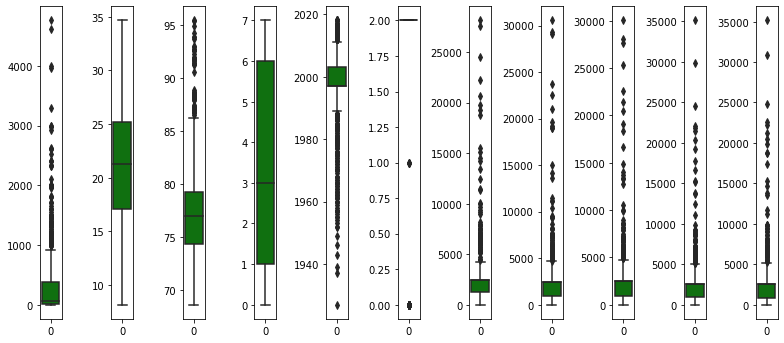

In [83]:
collist=df.columns.values
ncol=11
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Observations-

Outliers are present in columns-capacity_mw,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018

Outliers are not present in columns-latitude and primary_fuel

# Removing Outliers

In [86]:
from scipy.stats import zscore
features=df[['capacity_mw','longitude','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

z=np.abs(zscore(features))

df_new=df[(z<3).all(axis=1)]
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [87]:
z.head()

,capacity_mw,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.878280,1.069162e+00,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.386977,0.593788,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,0.486679,1.682394,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,0.324240,2.889052,5.310801e-01,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,1.027976,1.376637e+00,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00


In [90]:
print('Old DataFrame data in Rows and Column:',df.shape)
print('New DataFrame data in Rows and Column:',df_new.shape)
print('Total Dropped rows:',df.shape[0]-df_new.shape[0])

Old DataFrame data in Rows and Column: (907, 11)
New DataFrame data in Rows and Column: (849, 11)
Total Dropped rows: 58


Percentage Data Loss using Zscore-

In [91]:
loss_percent=(907-849)/907*100
print(loss_percent,'%')

6.39470782800441 %


Zscore method using Scipy for Target Column 'capacity_mw'

In [92]:
features1=df[['longitude','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]
z1=np.abs(zscore(features1))
df_new1=df[(z1<3).all(axis=1)]
df_new1.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [93]:
z1.head()

,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.878280,1.069162e+00,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.593788,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,1.682394,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,2.889052,5.310801e-01,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,1.027976,1.376637e+00,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00


Percentage Data Loss using Zscore

In [94]:
print('Old DataFrame data in Rows and Column:',df.shape)
print('New DataFrame data in Rows and Column:',df_new1.shape)
print('Total Dropped rows:',df.shape[0]-df_new1.shape[0])

Old DataFrame data in Rows and Column: (907, 11)
New DataFrame data in Rows and Column: (855, 11)
Total Dropped rows: 52


In [95]:
loss_percent1=(907-849)/907*100
print(loss_percent1,'%')

6.39470782800441 %


IQR method for Target Column 'primary fuel'

In [96]:
#1st quantile
Q1=features.quantile(0.25)

#3rd quantile
Q3=features.quantile(0.75)

#IQR

IQR=Q3-Q1
df1=df[~((df<(Q1-1.5*IQR)) | (df >(Q3 + 1.5*IQR))).any(axis=1)]

In [97]:
print('Old DataFrame data in Rows and Column:',df.shape)
print('New DataFrame data in Rows and Column:',df1.shape)
print('Total Dropped rows:',df.shape[0]-df1.shape[0])

Old DataFrame data in Rows and Column: (907, 11)
New DataFrame data in Rows and Column: (438, 11)
Total Dropped rows: 469


# Checking for the Skewness

In [98]:
df_new.skew()

capacity_mw            1.979914
latitude              -0.109823
longitude              0.921980
primary_fuel           0.408694
commissioning_year    -0.845654
geolocation_source    -2.062603
generation_gwh_2014    1.526648
generation_gwh_2015    1.389889
generation_gwh_2016    1.413144
generation_gwh_2017    1.278735
generation_gwh_2018    1.315481
dtype: float64

Observations-

Skewness threshold taken is +/-0.5

All the columns are not normally distributed.

Columns which are having skewness-capacity_mw,longitude,latitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018

Capacity_mw column data is highly skewed

# Checking Skewness through data visualization

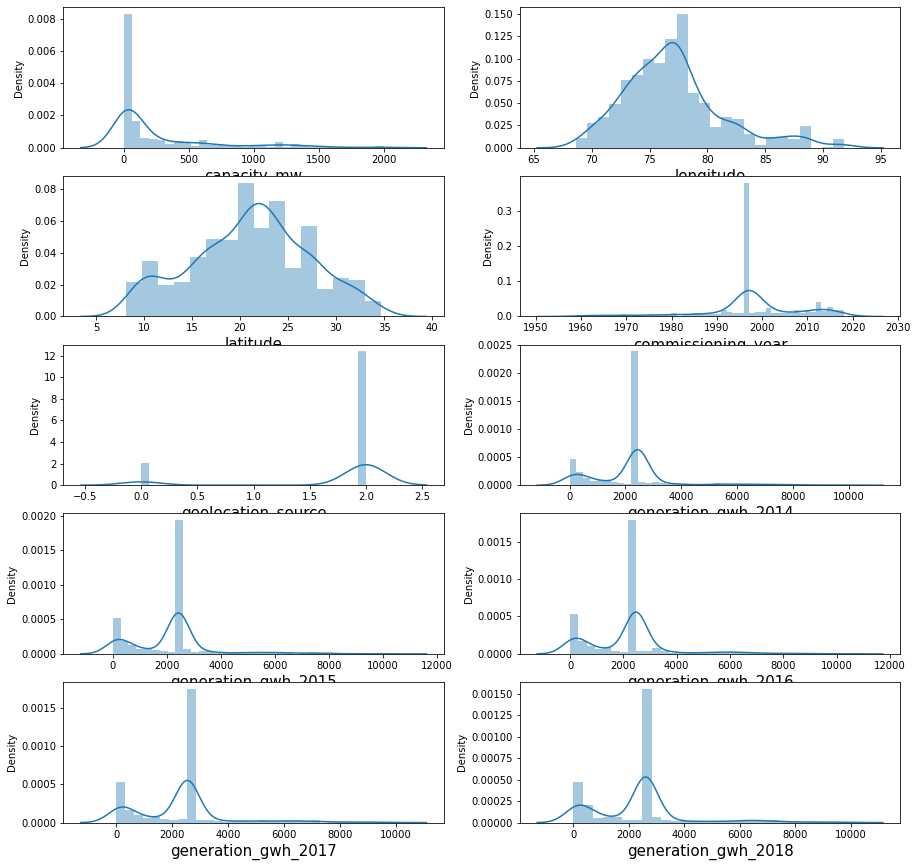

In [103]:
#Target Column is 'primary_fuel'
collist=['capacity_mw','longitude','latitude','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
plt.figure(figsize=(15,15))
plotnumber=1
for column in df_new[collist]:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see skewness is present in all columns

In [105]:
#target column 'capacity_mw'
df_new1.skew()

capacity_mw            2.163488
latitude              -0.110936
longitude              0.917381
primary_fuel           0.420074
commissioning_year    -0.836962
geolocation_source    -2.074380
generation_gwh_2014    1.525975
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2017    1.293269
generation_gwh_2018    1.421012
dtype: float64

Skewness threshold taken is +/-0.5

All the columns are not normally distributed.

capacity_mw column data is highly skewed but we will not remove skewness from it as it is a target column


Checking skewness through data visualization

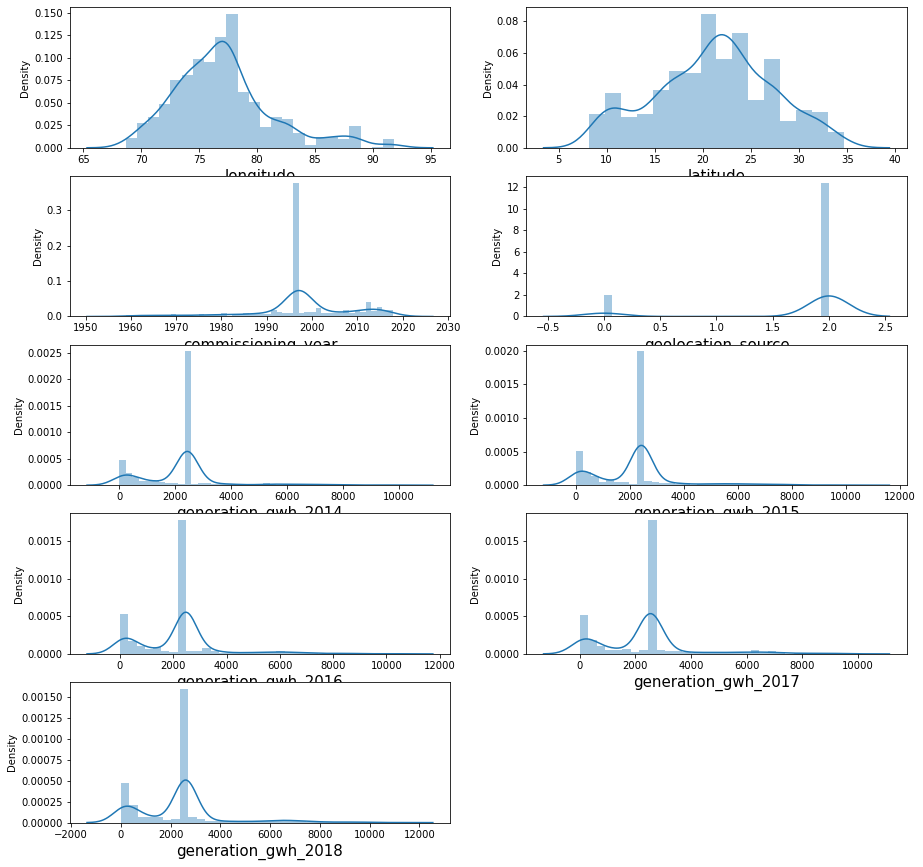

In [106]:
#target column is capacity_mw

collist=['longitude','latitude','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
plt.figure(figsize=(15,15))
plotnumber=1
for column in df_new1[collist]:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df_new1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see skewness is present in all columns

# Removing skewness using yeo-johnson method

In [108]:
#Target column is primary_fuel
from sklearn.preprocessing import power_transform,StandardScaler

collist=['capacity_mw','longitude','latitude','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
df_new[collist]=power_transform(df_new[collist],method='yeo-johnson')
df_new[collist]

,capacity_mw,longitude,latitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676571,-0.928072,1.164277,1.292854,-2.236076,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,-0.509209,0.595264,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,-2.363978,0.122311,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,2.442106,0.446997,0.501339,0.409608,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,1.253969,0.131611,1.795252,0.409608,0.665917,1.898269,1.935543,1.564919,2.122435
...,...,...,...,...,...,...,...,...,...,...
902,1.692530,0.219861,-0.793140,1.926982,0.409608,0.327200,-2.096477,-1.420156,-0.721222,-0.867297
903,-1.597223,0.409525,-1.339555,-0.181973,-2.447802,0.327200,0.356092,0.359399,0.360086,0.375133
904,-0.502886,-0.235273,-0.957619,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
905,0.118754,-0.768095,0.526266,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133


Checking skewness again after removal

In [109]:
df_new.skew()

capacity_mw            0.015527
latitude              -0.069694
longitude              0.000035
primary_fuel           0.408694
commissioning_year     0.031733
geolocation_source    -2.035892
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

Checking skewness through data visualization again after removal

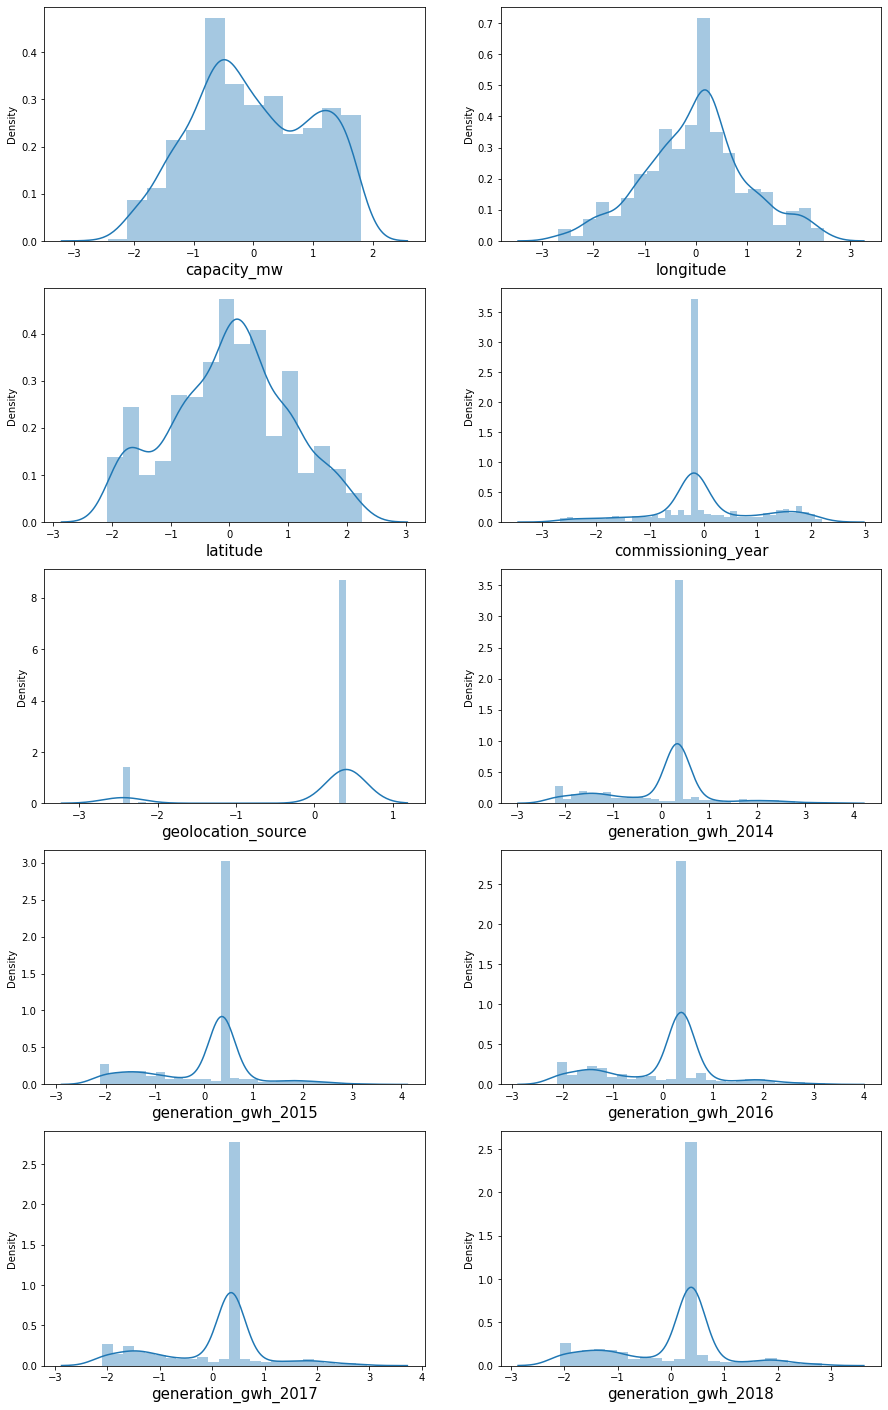

In [110]:
#Target column is primary_fuel
collist=['capacity_mw','longitude','latitude','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

plt.figure(figsize=(15,25))
plotnumber=1

for column in df_new[collist]:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [111]:
collist=['longitude','latitude','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
df_new1[collist]=power_transform(df_new1[collist],method='yeo-johnson')
df_new1[collist]

,longitude,latitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.932921,1.167827,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,-0.513810,0.596640,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,-2.368066,0.122069,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,2.447853,0.447846,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,1.253377,0.131399,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...
902,0.216288,-0.795932,1.900885,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
903,0.406355,-1.343416,-0.192081,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994
904,-0.239580,-0.960773,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
905,-0.772877,0.527395,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994


In [112]:
df_new1.skew()

capacity_mw            2.163488
latitude              -0.068504
longitude             -0.000494
primary_fuel           0.420074
commissioning_year     0.028796
geolocation_source    -2.047591
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
dtype: float64

Checking skewness through data visualization again after removal

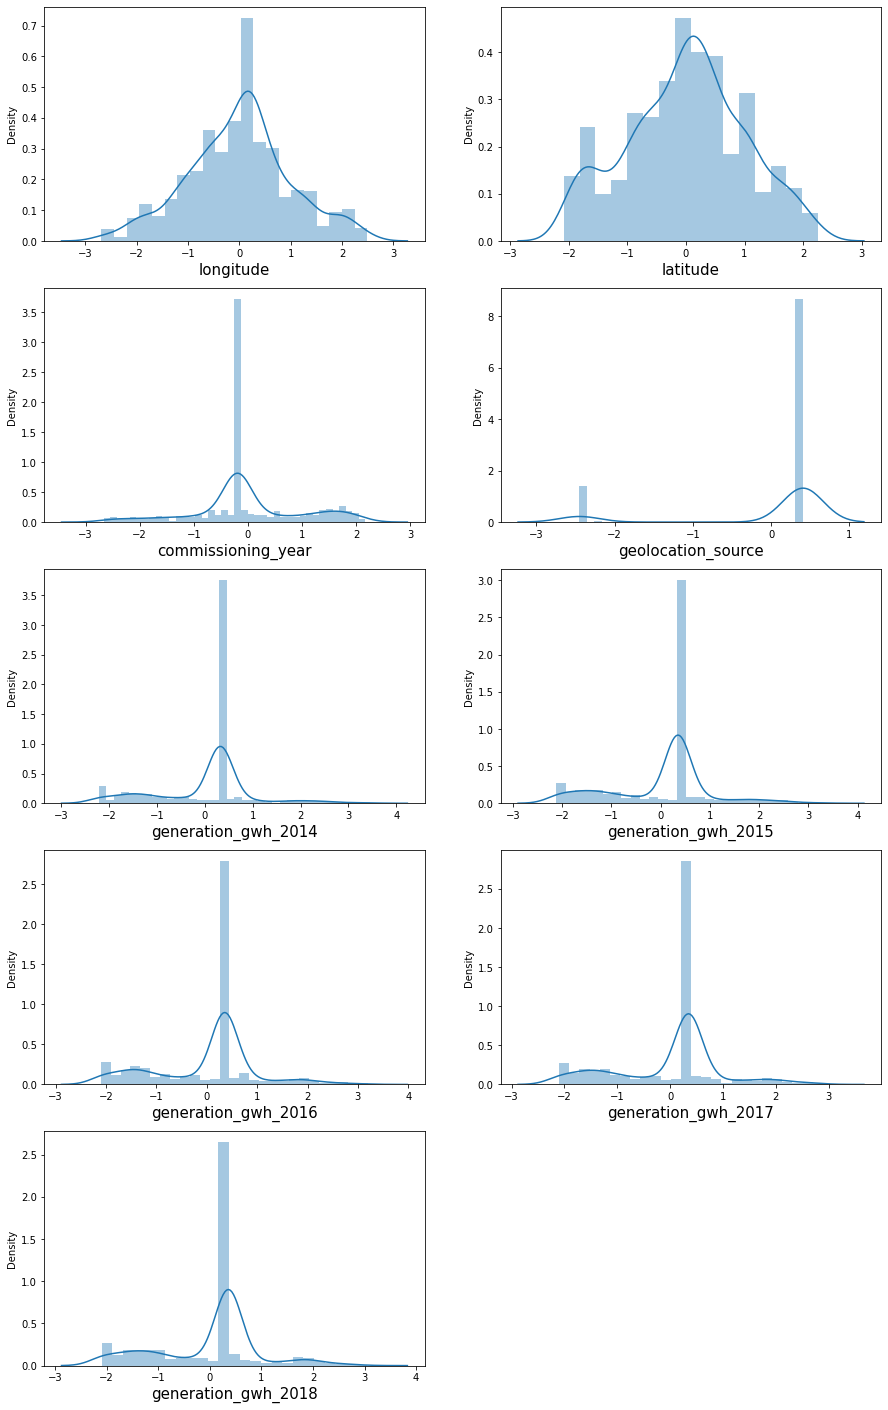

In [113]:
#Target column is capacity_mw
collist=['longitude','latitude','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

plt.figure(figsize=(15,25))
plotnumber=1

for column in df_new1[collist]:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df_new1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

Now we can see that the data is almost normally distributed.But we can see that the feature variables are negatively skewed and it will inverse relationship between feature variable and target variables.So to remove this we will use variance threshold method.

# Data preprocessing

# Splitting data into target and features

In [114]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [115]:
#target variable is primary_fuel

x=df_new.drop('primary_fuel',axis=1)
y=df_new['primary_fuel']

In [116]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676571,1.164277,-0.928072,1.292854,-2.236076,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,0.595264,-0.509209,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,0.122311,-2.363978,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,0.446997,2.442106,0.501339,0.409608,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,0.131611,1.253969,1.795252,0.409608,0.665917,1.898269,1.935543,1.564919,2.122435


In [117]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [118]:
x.shape,y.shape

((849, 10), (849,))

In [119]:
y.value_counts()

1    235
3    221
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

The data is not balanced.So we will use oversampling method to balance it.

# Oversampling using the SMOTE

In [120]:
from imblearn import under_sampling,over_sampling
from imblearn.over_sampling import SMOTE

In [121]:
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [122]:
y.value_counts()

6    235
1    235
7    235
2    235
3    235
0    235
5    235
4    235
Name: primary_fuel, dtype: int64

After using oversampling method,we check that now our data is balanced.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

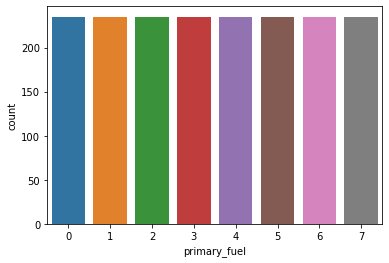

In [123]:
sns.countplot(y)

# Scaling data using Standard Scaler

In [124]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [125]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.762762,1.451189,-0.868135,1.705147,-2.468529,0.302515,0.345865,0.366576,0.333084,0.388106
1,0.206197,0.854546,-0.395189,-0.158671,0.372160,0.302515,0.345865,0.366576,0.333084,0.388106
2,-0.307880,0.358627,-2.489448,-0.158671,0.372160,0.302515,0.345865,0.366576,0.333084,0.388106
3,0.384450,0.699080,2.937204,0.704867,0.372160,-1.001118,-0.677371,-0.590574,-0.855098,-0.816581
4,1.780941,0.368380,1.595653,2.340054,0.372160,0.624072,1.796814,1.812484,1.464462,2.006406


# Target Variable is capacity_mw

In [126]:
x1=df_new1.drop('capacity_mw',axis=1)
y1=df_new1['capacity_mw']

In [127]:
x1.head()

,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.167827,-0.932921,6,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,0.596640,-0.513810,1,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,0.122069,-2.368066,7,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,0.447846,2.447853,2,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,0.131399,1.253377,1,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635


In [128]:
y1.head()

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [129]:
y1.value_counts()

5.00       37
10.00      21
15.00      20
600.00     20
1200.00    19
           ..
119.80      1
21.84       1
195.00      1
645.00      1
106.60      1
Name: capacity_mw, Length: 334, dtype: int64

# Scaling data using Standard Scaler

In [130]:
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)

In [131]:
x1.head()

,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.167827,-0.932921,1.179853,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,0.596640,-0.513810,-0.972887,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,0.122069,-2.368065,1.610401,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,0.447846,2.447853,-0.542339,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,0.131399,1.253377,-0.972887,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635


# Variance Threshold Method

Removes all features which variance doesn't meet some threshold.

In [143]:
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif

Target Variable is primary_fuel

In [134]:
var_threshold=VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [135]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [136]:
x.columns[var_threshold.get_support()]

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [137]:
#taking out all the constant columns
cons_columns=[column for column in x.columns
              if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


Target Variable is capacity_mw

In [138]:
var_threshold=VarianceThreshold(threshold=0)
var_threshold.fit(x1)

VarianceThreshold(threshold=0)

In [139]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [140]:
x1.columns[var_threshold.get_support()]

Index(['latitude', 'longitude', 'primary_fuel', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [141]:
#taking out all the constant columns
cons_columns1=[column for column in x1.columns
               if column not in x1.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


# SelectKBest Method

Target Variable is primary_fuel

In [150]:
best_fit=SelectKBest(score_func = f_classif, k='all')
fit=best_fit.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [151]:
fit=best_fit.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
dfcolumns.head()
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(12,'Score'))

               Feature        Score
4   geolocation_source  8506.867460
0          capacity_mw   483.087022
5  generation_gwh_2014   198.128976
9  generation_gwh_2018   166.071486
6  generation_gwh_2015   156.705390
7  generation_gwh_2016   156.515848
8  generation_gwh_2017   129.558836
2            longitude    75.702808
1             latitude    58.857612
3   commissioning_year    48.530462


The column commissioning_year has most lowest features for the prediction so we will drop this column.

In [152]:
x=x.drop(['commissioning_year'],axis=1)


In [153]:
x

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.762762,1.451189,-0.868135,-2.468529,0.302515,0.345865,0.366576,0.333084,0.388106
1,0.206197,0.854546,-0.395189,0.372160,0.302515,0.345865,0.366576,0.333084,0.388106
2,-0.307880,0.358627,-2.489448,0.372160,0.302515,0.345865,0.366576,0.333084,0.388106
3,0.384450,0.699080,2.937204,0.372160,-1.001118,-0.677371,-0.590574,-0.855098,-0.816581
4,1.780941,0.368380,1.595653,0.372160,0.624072,1.796814,1.812484,1.464462,2.006406
...,...,...,...,...,...,...,...,...,...
1875,-0.117861,-0.839637,-0.009594,0.372160,0.302515,0.345865,0.366576,0.333084,0.388106
1876,-0.177749,0.395862,-2.270871,0.372160,0.302515,0.345865,0.366576,0.333084,0.388106
1877,-0.342408,0.464708,-2.136474,0.372160,0.302515,0.345865,0.366576,0.333084,0.388106
1878,-0.430153,0.236919,0.457336,0.372160,0.302515,0.345865,0.366576,0.333084,0.388106


Target Variable is capacity_mw

In [154]:
best_fit1=SelectKBest(score_func = f_classif, k='all')
fit1=best_fit1.fit(x1,y1)
dfscores1=pd.DataFrame(fit.scores_)
dfcolumns1=pd.DataFrame(x1.columns)

In [155]:
fit1=best_fit1.fit(x1,y1)
dfscores1=pd.DataFrame(fit1.scores_)
dfcolumns1=pd.DataFrame(x1.columns)
dfcolumns1.head()
featureScores1=pd.concat([dfcolumns1,dfscores1],axis=1)
featureScores1.columns=['Feature','Score']
print(featureScores1.nlargest(11,'Score'))

               Feature     Score
9  generation_gwh_2018  4.769757
8  generation_gwh_2017  4.381400
7  generation_gwh_2016  3.957211
5  generation_gwh_2014  3.396666
6  generation_gwh_2015  3.378346
4   geolocation_source  3.275491
2         primary_fuel  3.196157
3   commissioning_year  2.276087
1            longitude  1.710206
0             latitude  1.404031


The column latitude has most lowest features for the prediction so we will drop this column.

In [ ]:
x1=x1.drop(['latitude'],axis=1)

In [159]:
x1

,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.932921,1.179853,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,-0.513810,-0.972887,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,-2.368065,1.610401,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,2.447853,-0.542339,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,1.253377,-0.972887,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...
850,0.216288,-0.972887,1.900885,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
851,0.406355,1.179853,-0.192081,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994
852,-0.239580,1.610401,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
853,-0.772877,-0.972887,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994


# Checking for Multicolinearity

# Variance Inflation Factor(VIF)

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
vif=pd.DataFrame()

In [164]:
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,1.383242,capacity_mw
1,1.153268,latitude
2,1.182007,longitude
3,1.445630,geolocation_source
4,6.241539,generation_gwh_2014
5,11.062765,generation_gwh_2015
6,17.652836,generation_gwh_2016
7,8.559639,generation_gwh_2017
8,14.670266,generation_gwh_2018


The column generation_gwh_2016 is having highest VIF value so we will drop column .

In [165]:
x.drop('generation_gwh_2016',axis=1,inplace=True)

In [166]:
x

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,-1.762762,1.451189,-0.868135,-2.468529,0.302515,0.345865,0.333084,0.388106
1,0.206197,0.854546,-0.395189,0.372160,0.302515,0.345865,0.333084,0.388106
2,-0.307880,0.358627,-2.489448,0.372160,0.302515,0.345865,0.333084,0.388106
3,0.384450,0.699080,2.937204,0.372160,-1.001118,-0.677371,-0.855098,-0.816581
4,1.780941,0.368380,1.595653,0.372160,0.624072,1.796814,1.464462,2.006406
...,...,...,...,...,...,...,...,...
1875,-0.117861,-0.839637,-0.009594,0.372160,0.302515,0.345865,0.333084,0.388106
1876,-0.177749,0.395862,-2.270871,0.372160,0.302515,0.345865,0.333084,0.388106
1877,-0.342408,0.464708,-2.136474,0.372160,0.302515,0.345865,0.333084,0.388106
1878,-0.430153,0.236919,0.457336,0.372160,0.302515,0.345865,0.333084,0.388106


Checking again Multicolinearity using VIF

In [167]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,1.382360,capacity_mw
1,1.153243,latitude
2,1.163392,longitude
3,1.444815,geolocation_source
4,6.241243,generation_gwh_2014
5,8.556108,generation_gwh_2015
6,7.464076,generation_gwh_2017
7,12.067934,generation_gwh_2018


The column generation_gwh_2018 is having multicolinearity so we will drop this column.

In [178]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,1.382360,capacity_mw
1,1.153243,latitude
2,1.163392,longitude
3,1.444815,geolocation_source
4,6.241243,generation_gwh_2014
5,8.556108,generation_gwh_2015
6,7.464076,generation_gwh_2017
7,12.067934,generation_gwh_2018


Multicolinearity is removed.

VIF for Target variable is capacity_mw

In [172]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features']=x1.columns
vif

,VIF values,Features
0,1.266319,longitude
1,1.480675,primary_fuel
2,1.091987,commissioning_year
3,1.355848,geolocation_source
4,4.125029,generation_gwh_2014
5,7.688435,generation_gwh_2015
6,9.684429,generation_gwh_2016
7,5.200834,generation_gwh_2018


The column geneartion_gwh_2017 having highest multicolinearity so we will drop this column

In [170]:
x1.drop('generation_gwh_2017',axis=1,inplace=True)

In [179]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x1.values,i) for i in range(len(x.columns))]
vif['Features']=x1.columns
vif

,VIF values,Features
0,1.266319,longitude
1,1.480675,primary_fuel
2,1.091987,commissioning_year
3,1.355848,geolocation_source
4,4.125029,generation_gwh_2014
5,7.688435,generation_gwh_2015
6,9.684429,generation_gwh_2016
7,5.200834,generation_gwh_2018


Multicolinearity is removed.

# Creating model

In [206]:
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.metrics import roc_curve,auc,roc_auc_score,accuracy_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

Finding the best random state among all models

In [187]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is-',maxAccu,'on Random_state',maxRS)       

Best accuracy is- 0.8617021276595744 on Random_state 99


Creating train-test-split

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [190]:
x.shape,y.shape

((1880, 8), (1880,))

In [191]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1316, 8), (1316,), (564, 8), (564,))

# Logistic Regression

In [194]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print('Accuracy Score:',accuracy_score(y_test,pred_lr))
print('confusion matrix:\n',confusion_matrix(y_test,pred_lr))
print('classification report:\n',classification_report(y_test,pred_lr))

Accuracy Score: 0.5780141843971631
confusion matrix:
 [[51  0  0  0  0  0  0 21]
 [ 7 34 11 13 17  1  0  0]
 [ 0  2 34 10  5  7  0 12]
 [13  7 10 15  0  9  0  4]
 [ 0 11  0  3 49  3  0  0]
 [ 3  0  0  1  0 40  0 24]
 [ 0  0  0  0  0  0 68  0]
 [37  3  2  1  1  0  0 35]]
classification report:
               precision    recall  f1-score   support

           0       0.46      0.71      0.56        72
           1       0.60      0.41      0.49        83
           2       0.60      0.49      0.54        70
           3       0.35      0.26      0.30        58
           4       0.68      0.74      0.71        66
           5       0.67      0.59      0.62        68
           6       1.00      1.00      1.00        68
           7       0.36      0.44      0.40        79

    accuracy                           0.58       564
   macro avg       0.59      0.58      0.58       564
weighted avg       0.59      0.58      0.57       564



# Random Forest Classifier

In [197]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print('accuracy_score:',accuracy_score(y_test,pred_rfc))
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_rfc))
print('classification_report:\n',classification_report(y_test,pred_rfc))

accuracy_score: 0.8723404255319149
Confusion_matrix:
 [[71  0  0  0  0  0  0  1]
 [ 3 47 11  9  9  1  0  3]
 [ 1  2 62  2  0  3  0  0]
 [ 4  1  3 48  0  0  0  2]
 [ 0  0  0  0 64  2  0  0]
 [ 0  1  2  0  0 64  0  1]
 [ 0  0  0  0  0  0 68  0]
 [ 4  0  1  5  0  0  1 68]]
classification_report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92        72
           1       0.92      0.57      0.70        83
           2       0.78      0.89      0.83        70
           3       0.75      0.83      0.79        58
           4       0.88      0.97      0.92        66
           5       0.91      0.94      0.93        68
           6       0.99      1.00      0.99        68
           7       0.91      0.86      0.88        79

    accuracy                           0.87       564
   macro avg       0.87      0.88      0.87       564
weighted avg       0.88      0.87      0.87       564



# Decision Tree Classifier

In [198]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print('accuracy_score:',accuracy_score(y_test,pred_dtc))
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_dtc))
print('classification_report:\n',classification_report(y_test,pred_dtc))

accuracy_score: 0.851063829787234
Confusion_matrix:
 [[68  2  0  0  0  0  0  2]
 [ 3 47  8 13  7  2  0  3]
 [ 1  2 60  5  0  2  0  0]
 [ 3  1  2 49  1  0  0  2]
 [ 0  2  0  3 61  0  0  0]
 [ 0  7  0  0  0 61  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 4  1  0  6  0  1  1 66]]
classification_report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        72
           1       0.76      0.57      0.65        83
           2       0.86      0.86      0.86        70
           3       0.64      0.84      0.73        58
           4       0.88      0.92      0.90        66
           5       0.92      0.90      0.91        68
           6       0.99      1.00      0.99        68
           7       0.90      0.84      0.87        79

    accuracy                           0.85       564
   macro avg       0.85      0.86      0.85       564
weighted avg       0.85      0.85      0.85       564



# Support Vector Machine Classifier

In [201]:
svc=SVC(kernel='linear',gamma=3)
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

print('accuracy_score:',accuracy_score(y_test,pred_svc))
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_svc))
print('classification_report:\n',classification_report(y_test,pred_svc))

accuracy_score: 0.6187943262411347
Confusion_matrix:
 [[72  0  0  0  0  0  0  0]
 [ 9 34 10 13 17  0  0  0]
 [ 2  2 39 10  3  5  0  9]
 [17  6 12 15  1  7  0  0]
 [ 0 11  0  0 55  0  0  0]
 [ 5  0  0  0  0 42  0 21]
 [ 0  0  0  0  0  0 68  0]
 [48  4  3  0  0  0  0 24]]
classification_report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64        72
           1       0.60      0.41      0.49        83
           2       0.61      0.56      0.58        70
           3       0.39      0.26      0.31        58
           4       0.72      0.83      0.77        66
           5       0.78      0.62      0.69        68
           6       1.00      1.00      1.00        68
           7       0.44      0.30      0.36        79

    accuracy                           0.62       564
   macro avg       0.63      0.62      0.61       564
weighted avg       0.63      0.62      0.60       564



# KNN Classifier

In [204]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print('accuracy_score:',accuracy_score(y_test,pred_knn))
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_knn))
print('classification_report:\n',classification_report(y_test,pred_knn))

accuracy_score: 0.8173758865248227
Confusion_matrix:
 [[72  0  0  0  0  0  0  0]
 [ 5 43 11 10  9  1  0  4]
 [ 1  1 58  1  0  9  0  0]
 [ 3  3  4 36  2  1  0  9]
 [ 0  0  3  0 63  0  0  0]
 [ 4  0  1  0  0 61  0  2]
 [ 0  0  0  0  0  0 68  0]
 [ 9  1  1  5  0  2  1 60]]
classification_report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        72
           1       0.90      0.52      0.66        83
           2       0.74      0.83      0.78        70
           3       0.69      0.62      0.65        58
           4       0.85      0.95      0.90        66
           5       0.82      0.90      0.86        68
           6       0.99      1.00      0.99        68
           7       0.80      0.76      0.78        79

    accuracy                           0.82       564
   macro avg       0.82      0.82      0.81       564
weighted avg       0.82      0.82      0.81       564



# Gradient Boosting Classifier

In [207]:
gb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=4)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)

print('accuracy_score:',accuracy_score(y_test,pred_gb))
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_gb))
print('classification_report:\n',classification_report(y_test,pred_gb))

accuracy_score: 0.849290780141844
Confusion_matrix:
 [[69  0  0  0  0  0  0  3]
 [ 4 51  9  9  6  1  0  3]
 [ 1  2 58  3  0  3  0  3]
 [ 5  0  4 45  0  0  0  4]
 [ 0  4  0  1 61  0  0  0]
 [ 4  1  2  0  0 60  0  1]
 [ 0  0  0  0  0  0 68  0]
 [ 4  0  1  7  0  0  0 67]]
classification_report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87        72
           1       0.88      0.61      0.72        83
           2       0.78      0.83      0.81        70
           3       0.69      0.78      0.73        58
           4       0.91      0.92      0.92        66
           5       0.94      0.88      0.91        68
           6       1.00      1.00      1.00        68
           7       0.83      0.85      0.84        79

    accuracy                           0.85       564
   macro avg       0.85      0.85      0.85       564
weighted avg       0.86      0.85      0.85       564



# Cross Validation Score for all Regression Model

CV Score for Logistic Regression

In [208]:
print('CV Score for Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())

CV Score for Logistic Regression: 0.5872340425531914


CV Score for Random Forest Classifier

In [209]:
print('CV Score for Random Forest Classifier:',cross_val_score(rfc,x,y,cv=5).mean())

CV Score for Random Forest Classifier: 0.8739361702127659


CV Score for Decision Tree Classifier

In [210]:
print('CV Score for Decision Tree Classifier:',cross_val_score(dtc,x,y,cv=5).mean())

CV Score for Decision Tree Classifier: 0.8367021276595745


CV Score for Support Vector Classifier

In [211]:
print('CV Score for Support Vector Classifier:',cross_val_score(svc,x,y,cv=5).mean())

CV Score for Support Vector Classifier: 0.651063829787234


CV Score for KNN Classifier

In [212]:
print('CV Score for KNN Classifier:',cross_val_score(knn,x,y,cv=5).mean())

CV Score for KNN Classifier: 0.8409574468085106


CV Score for Gradient Boosting Classifier

In [213]:
print('CV Score for Gradient Boosting Classifier:',cross_val_score(gb,x,y,cv=5).mean())

CV Score for Gradient Boosting Classifier: 0.8537234042553191


Hyper parameter tuning for best model using GridsearchCV

In [233]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
              'criterion':['gini','entropy']}

In [234]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [235]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.8262411347517731

# Save the Best Model

In [237]:
import joblib
joblib.dump(rf,'rf_fuel.pk1')

['rf_fuel.pk1']

# Target Column is 'capacity_mw'

In [240]:
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    modDTR = DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred=modDTR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best accuracy is:{maxAcc} on Random_state:{maxRS}")       

Best accuracy is:0.7798707810067359 on Random_state:27


Creating train-test split

In [241]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [242]:
x1.shape,y1.shape

((855, 8), (855,))

In [243]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((598, 8), (598,), (257, 8), (257,))

# Linear Regression

In [244]:
from sklearn.linear_model import LinearRegression

In [245]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("R2 score:",r2_score(y_test,pred_lr))
print("Mean abs error:",mean_absolute_error(y_test,pred_lr))
print("Mean squared error:",mean_squared_error(y_test,pred_lr))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.5115489064786144
Mean abs error: 235.69632664319388
Mean squared error: 109133.56775626788
Root Mean Squared Error 330.35370098769573


Checking the performance of the model by graph

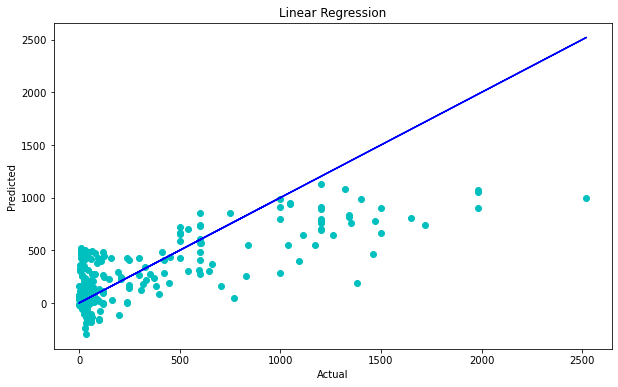

In [246]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_lr,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

# Random Forest Regression Model

In [247]:
RFR=RandomForestRegressor(n_estimators=600,random_state=28)
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)

print("R2 score:",r2_score(y_test,pred_RFR))
print("Mean abs error:",mean_absolute_error(y_test,pred_RFR))
print("Mean squared error:",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score: 0.8606661217570274
Mean abs error: 95.76554490759462
Mean squared error: 31131.06602413057
Root Mean Squared Error 176.43997853131407


Check the performance of the model by graph

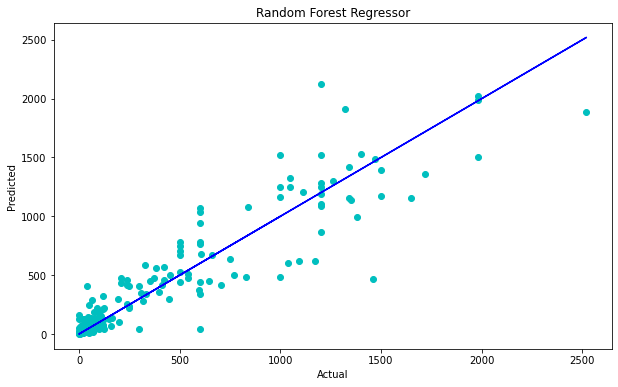

In [248]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_RFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

# KNN Regressor

In [250]:
knn=KNeighborsRegressor(n_neighbors=9)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print("R2 score:",r2_score(y_test,pred_knn))
print("Mean abs error:",mean_absolute_error(y_test,pred_knn))
print("Mean squared error:",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.7821069410289806
Mean abs error: 114.86811111111112
Mean squared error: 48683.373279812506
Root Mean Squared Error 220.6430902607478


Checking the perfomance of the model by graph

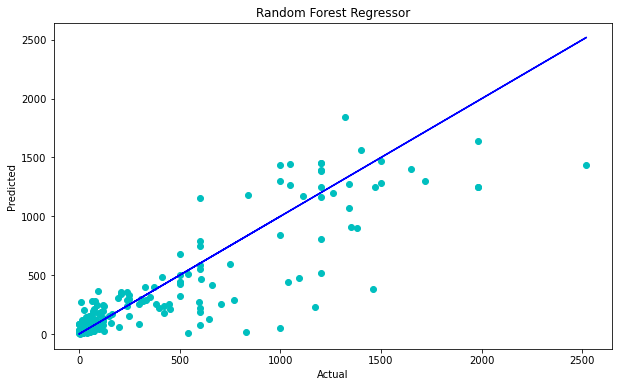

In [252]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_knn,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

# Decision Tree Regressor

In [253]:
DTR=DecisionTreeRegressor(random_state=29)
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)

print("R2 score:",r2_score(y_test,pred_DTR))
print("Mean abs error:",mean_absolute_error(y_test,pred_DTR))
print("Mean squared error:",mean_squared_error(y_test,pred_DTR))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 score: 0.7873119223079035
Mean abs error: 114.81151715599576
Mean squared error: 47520.43560886107
Root Mean Squared Error 217.99182463767093


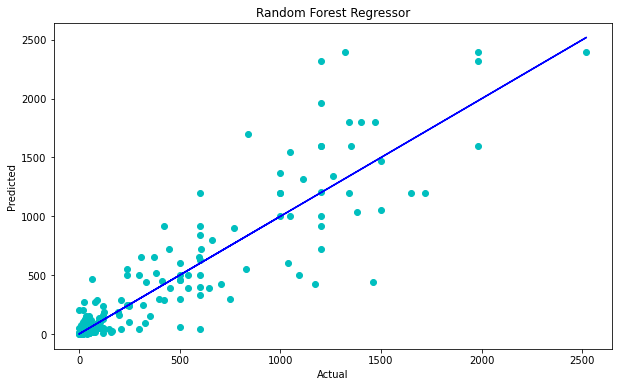

In [254]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_DTR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

# Checking Cross Validation Score of Models

CV Score for Linear Regression

In [255]:
print('The CV score for Linear_Regression is:',cross_val_score(lr,x1,y1,cv=7).mean())

The CV score for Linear_Regression is: 0.3648905069958384


CV Score for RandomForest Regression

In [256]:
print('The CV score for Random ForestRegression is:',cross_val_score(RFR,x1,y1,cv=7).mean())

The CV score for Random ForestRegression is: 0.78076013569702


Checking CV Score for KNN

In [257]:
print('The CV score for KNN Regressor:',cross_val_score(knn,x1,y1,cv=7).mean())

The CV score for KNN Regressor: 0.7100254349326253


CV Score for DTR

In [258]:
print('The CV score for DTR  is:',cross_val_score(DTR,x1,y1,cv=7).mean())

The CV score for DTR  is: 0.6440238015128327


# Hyper Parameter Tuning

In [259]:
parameter={ 'n_estimators':[30,60,80],
             'max_depth':[10,20,40],
             'min_samples_leaf':[5,10,20],
             'min_samples_split':[5,10],
             'criterion':['mse','mae'],
              'max_feature':["auto","sqrt","log2"]}

In [260]:
GridCV= GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs=-1,verbose=1)

# Creating Final Regressor Model

In [262]:
Best_model=RandomForestRegressor(n_estimators=60,criterion='mse',max_depth=20,max_features='auto',min_samples_leaf=5,min_samples_split=10)
Best_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=60)

In [263]:
pred=Best_model.predict(x_test)
acc=r2_score(y_test,pred_RFR)
print(acc*100)

86.06661217570274


# Saving the Best Model

In [264]:
import pickle

In [265]:
filename='Global_Capacity_plant.pickle'
pickle.dump(Best_model,open(filename,'wb'))

# Conclusion-

In this project we build two models one defining primary fuel and second capaity
with maximum accuracy.